In [1]:
pip install ultralytics roboflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 1: Install required libraries
!pip install ultralytics roboflow opencv-python

# Step 2: Import necessary libraries
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Step 3: Initialize Roboflow and download dataset
rf = Roboflow(api_key="tdXbE45ZGMucFpuwRLRb")  # Replace with your actual API key
project = rf.workspace("construction-safety-bluwd").project("construction-safety-1")  # Replace with your workspace and project names
dataset = project.version(4).download("yolov8")  # Adjust version and format if needed

# Step 4: Load the YOLO model
model = YOLO("yolov8n.pt")  # Replace with your trained model or pre-trained model of your choice

# Step 5: Train or load pre-trained weights (if needed)
# Uncomment below lines if you want to fine-tune the model
# model.train(data=os.path.join(dataset.location, "data.yaml"), epochs=10)



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.95, to fix: `pip install ultralytics==8.0.196`



image 1/1 F:\PPE pics\OIP.jpeg: 448x640 1 person, 287.0ms
Speed: 11.0ms preprocess, 287.0ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2


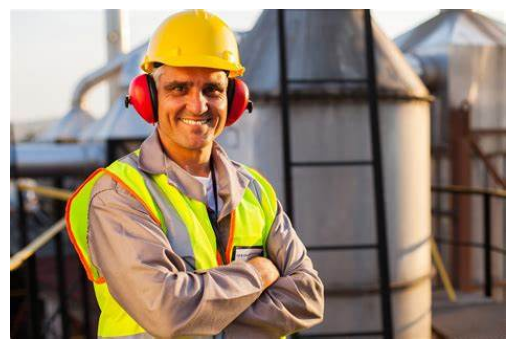

In [3]:
# Step 6: Run inference on an image
image_path = "F:\PPE pics"  # Replace with the path to your test image
results = model.predict(image_path, save=True)

# Step 7: Visualize results using Matplotlib
result_img = cv2.imread(results[0].path)

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(result_img_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [4]:
# Step 5: Initialize OpenCV for live video capture
cap = cv2.VideoCapture(0)  # Open the built-in camera (0 for default camera)

while True:
    # Step 6: Capture frame-by-frame from the camera
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Step 7: Run inference on the current frame
    results = model(frame)  # Perform object detection on the frame
    
    # Step 8: Render results on the frame
    annotated_frame = results[0].plot()  # Draw detections on the frame
    
    # Step 9: Display the frame with annotations
    cv2.imshow("Live Camera Detection", annotated_frame)  # Show the annotated frame

    # Step 10: Exit condition (press 'q' to quit)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 11: Release the camera and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 cat, 266.0ms
Speed: 4.0ms preprocess, 266.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 233.0ms
Speed: 6.0ms preprocess, 233.0ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 366.0ms
Speed: 17.0ms preprocess, 366.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bench, 266.0ms
Speed: 41.0ms preprocess, 266.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bench, 241.0ms
Speed: 15.0ms preprocess, 241.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 225.0ms
Speed: 12.0ms preprocess, 225.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bench, 233.0ms
Speed: 8.0ms preprocess, 233.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 255.0ms
Speed: 6.0ms preprocess, 255.0ms inference, 4.